In [1]:
import pandas as pd
import numpy as np


#un_filtered dataset
df = pd.read_csv("msamd_14454.csv", low_memory=False)
action_taken = df[['action_taken','state_code', 'census_tract']]
# action_taken.head()
# df.head()

#the new dataset new_df when actions_taken = 1; when actions_taken = 1, it means we only focus on the loan origionated. 
new_df = pd.read_csv("msamd_14454_actions_taken_1.csv", low_memory=False)
# new_df['action_taken']

new_df.head()
# print(new_df.columns.values.tolist())
# loan_application_record = new_df[['state_code','county_code','derived_msa-md','census_tract','action_taken','loan_amount','total_loan_costs']]
# loan_application_record['census_tract'] = loan_application_record['census_tract'].astype(float)
# loan_application_record['loan_amount'] = loan_application_record['loan_amount'].astype(float)
#Problem occurs: loan_amount fails to be collected together for each census tract, but 
#groupby() is doing its work. 
# mean = loan_application_record.groupby('census_tract')['loan_amount'].mean()
# mean

# average load for sullfolk county(25025.0) is 577590.272660
# avg_loan_ma = loan_application_record.groupby('county_code')['loan_amount'].mean()
# avg_loan_ma
# loan_application_record.tail(100)







,activity_year,lei,derived_msa-md,state_code,county_code,census_tract,conforming_loan_limit,derived_loan_product_type,derived_dwelling_category,derived_ethnicity,...,denial_reason-2,denial_reason-3,denial_reason-4,tract_population,tract_minority_population_percent,ffiec_msa_md_median_family_income,tract_to_msa_income_percentage,tract_owner_occupied_units,tract_one_to_four_family_homes,tract_median_age_of_housing_units
0,2021,B4TYDEB6GKMZO031MB27,14454,MA,25025.0,2.502502e+10,NC,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,...,NaN,NaN,NaN,4416,5.77,113700,238,1175,906,76
1,2021,B4TYDEB6GKMZO031MB27,14454,MA,25025.0,2.502502e+10,NC,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,...,NaN,NaN,NaN,4416,5.77,113700,238,1175,906,76
2,2021,549300DAUXQ2DCY4H838,14454,MA,25023.0,2.502350e+10,NC,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,...,NaN,NaN,NaN,5168,1.39,113700,142,1664,1776,46
3,2021,549300DAUXQ2DCY4H838,14454,MA,25021.0,2.502142e+10,NC,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,...,NaN,NaN,NaN,8281,2.21,113700,162,2293,3125,58
4,2021,TKT6FH38184ZYBTPKS77,14454,MA,25021.0,2.502140e+10,NC,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,...,NaN,NaN,NaN,4596,21.89,113700,222,1301,1554,76


/var/folders/yy/pdmswf251qs2tdymzfxsjbj40000gn/T/ipykernel_2618/109319104.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_application_record['census_tract'] = loan_application_record['census_tract'].astype(int)
/var/folders/yy/pdmswf251qs2tdymzfxsjbj40000gn/T/ipykernel_2618/109319104.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_application_record['loan_amount'] = loan_application_record['loan_amount'].astype(float)


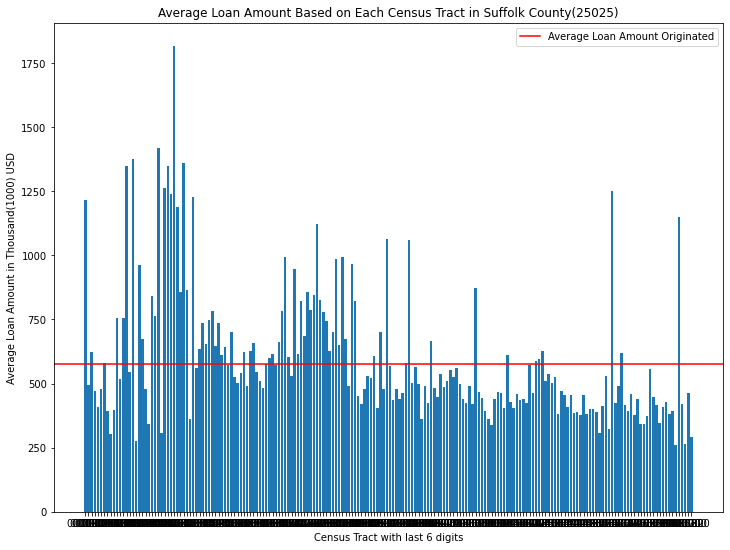

In [164]:
#filtered data: action_taken =1(when actions_taken = 1, it means we only focus on the loan origionated), only at sufflok county
import matplotlib.pyplot as plt
from decimal import Decimal

df_boston = pd.read_csv("origional_data_actions_taken_1_suffolk_county_25025.csv", low_memory=False)
# print(df_boston.columns.values.tolist())
df_boston.head()



# print(df_boston.columns.values.tolist())
loan_application_record = df_boston[['state_code','county_code','derived_msa-md','census_tract','action_taken','loan_amount','total_loan_costs']]
loan_application_record['census_tract'] = loan_application_record['census_tract'].astype(int)
loan_application_record['loan_amount'] = loan_application_record['loan_amount'].astype(float)
loan_application_record.to_csv('loan_amount.csv')
# average loan_amount for each census tract
mean = loan_application_record.groupby('census_tract',as_index=False)['loan_amount'].mean()
# mean_census.to_csv('avg_loan_each_census_tract.csv')
# mean
# list(mean.columns)

#for the sick of the plotting, i need to make the average loan amount 1000 times smaller.
mean['loan_amount'] = (mean['loan_amount']/1000)
mean['loan_amount'] = np.round(mean['loan_amount'], decimals = 3)#for better plotting
# maxValueIndex = mean.idxmax() #index of the max(outliar) avg loan amount for census tract is 84

#index of the min avg loan amount for census tract 
minValueIndex = mean[['loan_amount']].idxmin()

#find and remove the outliar
mean=mean.loc[mean['loan_amount']!=mean['loan_amount'].max()]

maxValueIndex = mean.idxmax()#index of the max avg loan amount for census tract 


#for the sick of the plotting,
mean['census_tract'] = mean['census_tract'].astype(str)
#census tract for areas in suffolk county all start with 25025, so remove 25025 to only show last 6 digits
mean['census_tract'] =mean['census_tract'].str[5:]#for better plotting


# mean
# maxValues = mean['loan_amount'].max()
# maxValues
plt.figure(figsize=(12,9))
plt.bar(mean['census_tract'],mean['loan_amount'])
plt.title("Average Loan Amount Based on Each Census Tract in Suffolk County(25025)")
plt.xlabel("Census Tract with last 6 digits")
plt.ylabel("Average Loan Amount in Thousand(1000) USD")
avg_loan_ma = loan_application_record.groupby('county_code')['loan_amount'].mean()
avg = 577590.27266/1000

average_amount=plt.axhline(y=avg, linestyle="-",color="red")
plt.legend(['Average Loan Amount Originated'])

# plt.savefig('Average Loan Amount Based on Each Census Tract in Suffolk County(25025).png')




In [4]:
loan_application_record.tail(100)

,state_code,county_code,derived_msa-md,census_tract,action_taken,loan_amount,total_loan_costs
27040,MA,25025,14454,25025040600,1,985000.0,3926.45
27041,MA,25025,14454,25025060101,1,985000.0,NaN
27042,MA,25025,14454,25025000502,1,985000.0,4106.7
27043,MA,25025,14454,25025000402,1,985000.0,5132.8
27044,MA,25025,14454,25025040300,1,985000.0,Exempt
...,...,...,...,...,...,...,...
27135,MA,25025,14454,25025092000,1,995000.0,24453.86
27136,MA,25025,14454,25025130200,1,995000.0,NaN
27137,MA,25025,14454,25025090400,1,995000.0,3037.5
27138,MA,25025,14454,25025092101,1,995000.0,NaN


In [180]:
# average load for sullfolk county(25025.0) is 577590.272660
avg_loan_ma = loan_application_record.groupby('county_code')['loan_amount'].mean()
avg_loan_ma

#index of the max avg loan amount for census tract is 28
index_max= maxValueIndex['loan_amount']
max_row = mean.iloc[index_max]


max_loan= max_row.values[1]
max_loan_census_tract = max_row.values[0]
# max_loan # = 1816456
# max_loan_census_tract# =25025010702

# min avg loan amount for census tract is
min_loan= mean['loan_amount'].min()
min_loan_census_tract = mean.loc[mean['loan_amount'] == min_loan]
min_loan_census_tract = min_loan_census_tract.values[0]

# min_loan  = 261250
# min_loan_census_tract = 25025981100


#create new dataframe for avg, max and min

# avgrow = {'census_tract':['25025000000'], 'Loan Amount':['577590.27266']}
# maxrow = {'census_tract':['25025010702'], 'Loan Amount':['1816456']}
# minrow = {'census_tract':['25025981100'], 'Loan Amount':['261250']}
# summary_data = pd.DataFrame(avgrow,maxrow,minrow,index=['average_amount','max_amount','min_amount'])
summary_data = pd.DataFrame()
summary_data['Index'] = ['average_amount', 'max_amount', 'min_amount']
summary_data['census_tract'] = ['25025000000', '25025010702', '25025981100']
summary_data['census_tract'] = (summary_data['census_tract']).apply(Decimal)
summary_data['Loan Amount'] = [577590.27266, 1816456, 261250]
  

# summary_data = pd.concat([summary_data, maxrow])

summary_data
summary_data.to_csv('summary_data.csv')

# max_loan_ma = mean['loan_amount'].max()
# max_loan_ma
# loan_application_record.tail(100)
# avg_loan_ma.to_csv('avg_loan_sufflok_county.csv')
